In [2]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('./ddwe/URD.csv')

X = data['Resume']
y = data['Category']

vectorizer = TfidfVectorizer(stop_words='english', max_features=5)
X_tfidf = vectorizer.fit_transform(X).toarray()

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)


In [3]:

# GaussianNB Model
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_predictions = gnb.predict(X_test)
gnb_accuracy = accuracy_score(y_test, gnb_predictions)
conf_gnb = confusion_matrix(y_test, gnb_predictions)
gnb_accuracy


0.16580310880829016

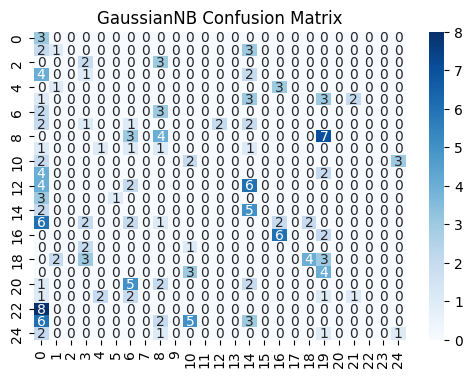

In [4]:

plt.figure(figsize=(6,4))
sns.heatmap(conf_gnb, annot=True, fmt="d", cmap="Blues")
plt.title('GaussianNB Confusion Matrix')
plt.show()


In [5]:

rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
rfc_predictions = rfc.predict(X_test)
rfc_accuracy = accuracy_score(y_test, rfc_predictions)
conf_rfc = confusion_matrix(y_test, rfc_predictions)
rfc_accuracy


0.8290155440414507

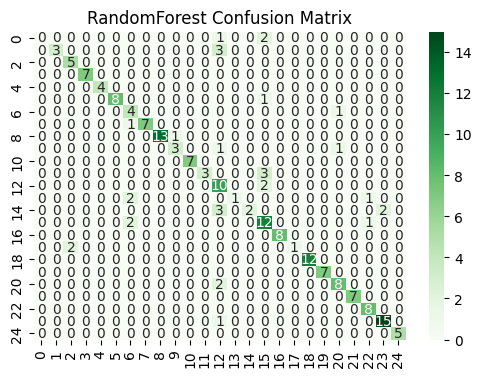

In [6]:

plt.figure(figsize=(6,4))
sns.heatmap(conf_rfc, annot=True, fmt="d", cmap="Greens")
plt.title('RandomForest Confusion Matrix')
plt.show()


In [7]:

svc = SVC(random_state=42)
svc.fit(X_train, y_train)
svc_predictions = svc.predict(X_test)
svc_accuracy = accuracy_score(y_test, svc_predictions)
conf_svc = confusion_matrix(y_test, svc_predictions)
svc_accuracy


0.37823834196891193

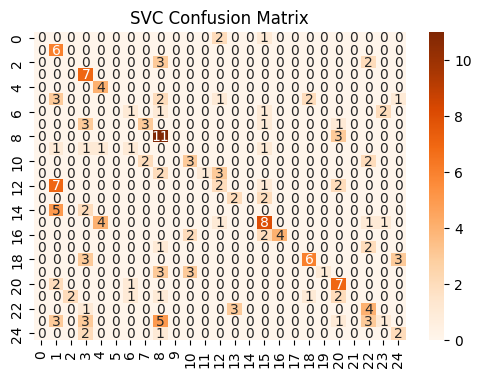

In [8]:

plt.figure(figsize=(6,4))
sns.heatmap(conf_svc, annot=True, fmt="d", cmap="Oranges")
plt.title('SVC Confusion Matrix')
plt.show()


In [9]:

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
conf_knn = confusion_matrix(y_test, knn_predictions)
knn_accuracy


0.7305699481865285

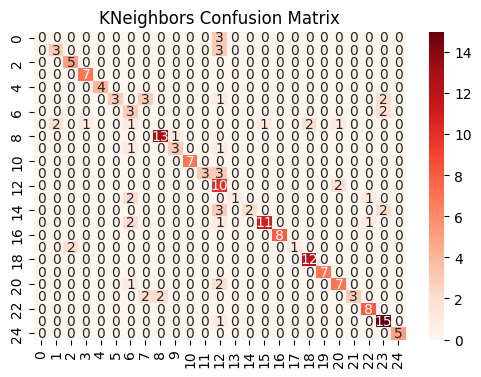

In [10]:

plt.figure(figsize=(6,4))
sns.heatmap(conf_knn, annot=True, fmt="d", cmap="Reds")
plt.title('KNeighbors Confusion Matrix')
plt.show()


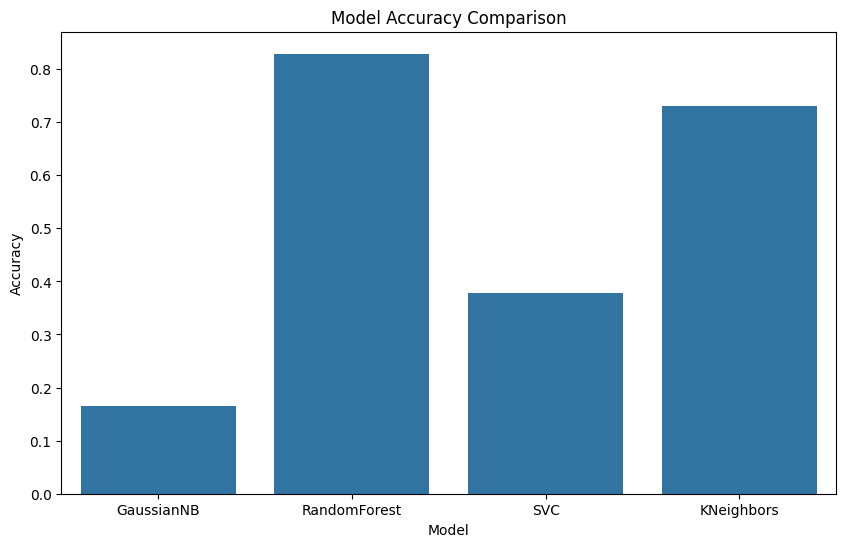

,Model,Accuracy
0,GaussianNB,0.165803
1,RandomForest,0.829016
2,SVC,0.378238
3,KNeighbors,0.730570


In [11]:

results = {
    "Model": ["GaussianNB", "RandomForest", "SVC", "KNeighbors"],
    "Accuracy": [gnb_accuracy, rfc_accuracy, svc_accuracy, knn_accuracy]
}

results_df = pd.DataFrame(results)

plt.figure(figsize=(10,6))
sns.barplot(x="Model", y="Accuracy", data=results_df)
plt.title("Model Accuracy Comparison")
plt.show()

results_df
